In [10]:
!pip install japanize-matplotlib
import japanize_matplotlib

ModuleNotFoundError: No module named 'distutils'

## 演習問題5.3    ( $C_{pe}=0.1$ )

Font 'default' does not have a glyph for '\u7dda' [U+7dda], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5f62' [U+5f62], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u306b' [U+306b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3088' [U+3088], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u308b' [U+308b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6c7a' [U+6c7a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5b9a' [U+5b9a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5883' [U+5883], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u754c' [U+754c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5206' [U+5206], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u96e2' [U+96e2], 

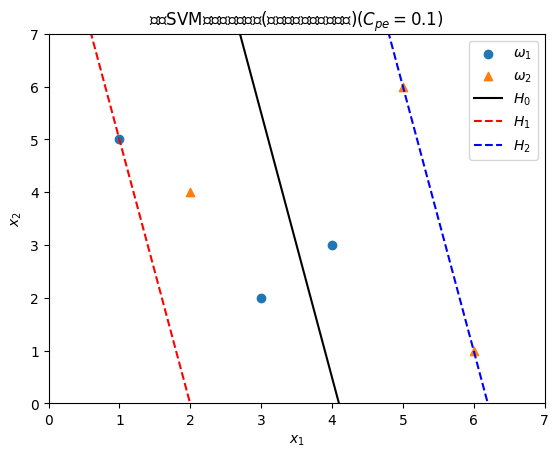

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

# ソフトマージンSVMのモデルを作成
C_pe = 0.1
model = svm.SVC(kernel='linear', C=C_pe)
model.fit(X, y)

# 識別関数 g(x) の係数
w = model.coef_[0]
b = model.intercept_[0]

# 決定境界 H_0, 超平面 H_1, H_2 の式
def decision_boundary(x):
    return (-w[0] * x - b) / w[1]

def margin1(x):
    return (-w[0] * x - b + 1) / w[1]

def margin2(x):
    return (-w[0] * x - b - 1) / w[1]


# 決定境界、超平面をプロット
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# ω1とω2ごとにデータをプロット
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='$ω_{1}$')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='^', label='$ω_{2}$')

plt.plot([x_min, x_max], [decision_boundary(x_min), decision_boundary(x_max)], 'k-', label='$H_{0}$')
plt.plot([x_min, x_max], [margin1(x_min), margin1(x_max)], 'r--', label='$H_{1}$')
plt.plot([x_min, x_max], [margin2(x_min), margin2(x_max)], 'b--', label='$H_{2}$')

plt.axis([0, 7, 0, 7])
plt.legend()
plt.title('線形SVMによる決定境界(線形分離不可能な場合)($C_{pe}=0.1$)')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()



### コードの解説

`sklearn`(Scikit-learn)は, Pythonで機械学習およびデータ分析のための広く使用されるライブラリの一つ. `sklearn.svm`モジュールは, サポートベクトルマシンを実装するための機能を提供している. 以下は, `sklearn.svm`モジュールの主な機能についての解説

1. **`SVC` (Support Vector Classification)**
   - `SVC`クラスはサポートベクトルマシンによる分類を実装している. 様々なカーネル関数(線形、多項式、RBF、シグモイドなど)を選択でき, 異なるパラメータを調整することが可能.
   - SVMは主に2クラス分類問題に使用されるが, `SVC`は`decision_function`メソッドを使用して多クラス分類にも拡張できる.

2. **`SVR` (Support Vector Regression)**
   - `SVR`クラスはサポートベクトルマシンによる回帰を実装している. 回帰問題に対してもSVMを使用できる.

3. **`OneClassSVM`:**
   - `OneClassSVM`クラスは、サポートベクトルマシンを使用した異常検知(One-Class SVM)を実装している. 一つのクラスに対する異常を検出するために使用される.

これらのクラスは共通のパラメータやメソッドを持っており、典型的な使い方は以下のようになります：

```python
from sklearn import svm

# モデルの作成
model = svm.SVC(kernel='linear', C=1.0)
# もしくは
model = svm.SVR(kernel='linear', C=1.0)
# もしくは
model = svm.OneClassSVM(kernel='linear', nu=0.1)

# データへの適合
model.fit(X, y)

# 予測
predictions = model.predict(new_data)
```

ここで `kernel` は使用するカーネル関数、`C` は正則化パラメータ、`nu` は `OneClassSVM` の異常検出におけるパラメータなどが指定される.

このモジュールは柔軟で強力なSVMの実装を提供しており, データの特性や問題によって適切なモデルを選択できる. 各クラスにはドキュメントがあり, 詳細なパラメータやメソッドの情報が記載されている.

1. ** `C_pe = 0.1` **
   - `C_pe`はソフトマージンSVMにおける誤分類に対するペナルティ(誤差の許容度)を制御するパラメータ.

2. **`model = svm.SVC(kernel='linear', C=C_pe)`**
   - `svm.SVC`クラスはサポートベクトル分類器を構築するためのクラス
   - `kernel='linear'`は線形カーネルを使用することを指定している. 線形SVMは直線で分類境界を引くモデル
   - `C`パラメータはペナルティパラメータであり, 先ほど定義した`C_pe`の値を使用している. このパラメータは, 個々のデータポイントに対する誤分類の影響を制御する.

3. **`model.fit(X, y)`**
   - `fit`メソッドはモデルを提供されたデータに適合させる.
   - `X`は学習データの特徴量行列で, 各行がサンプル, 各列が特徴量.
   - `y`は各サンプルに対するクラスラベル. この例では $1$ または $-1$ のクラスラベルを持つ $2$ クラス分類の問題を扱っている.

このコードの結果として、`model`には学習されたSVMモデルが格納され、このモデルを使用して新しいデータポイントを分類することができる.




## 演習問題5.3    ( $C_{pe}=10$ )

Font 'default' does not have a glyph for '\u7dda' [U+7dda], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5f62' [U+5f62], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u306b' [U+306b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3088' [U+3088], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u308b' [U+308b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6c7a' [U+6c7a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5b9a' [U+5b9a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5883' [U+5883], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u754c' [U+754c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5206' [U+5206], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u96e2' [U+96e2], 

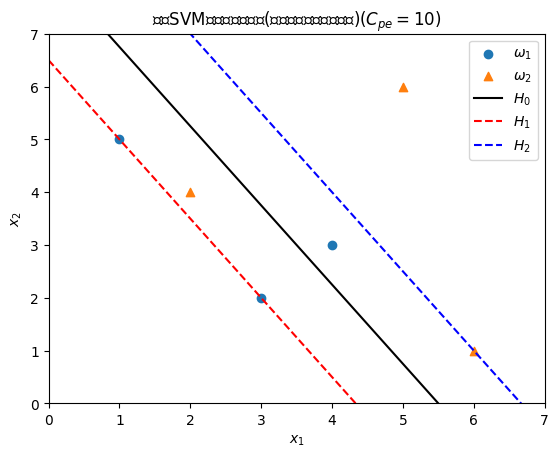

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

# ソフトマージンSVMのモデルを作成
C_pe = 10
model = svm.SVC(kernel='linear', C=C_pe)
model.fit(X, y)

# 識別関数 g(x) の係数
w = model.coef_[0]
b = model.intercept_[0]

# 決定境界 H_0, 超平面 H_1, H_2 の式
def decision_boundary(x):
    return (-w[0] * x - b) / w[1]

def margin1(x):
    return (-w[0] * x - b + 1) / w[1]

def margin2(x):
    return (-w[0] * x - b - 1) / w[1]


# 決定境界、超平面をプロット
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# ω1とω2ごとにデータをプロット
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='$ω_{1}$')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='^', label='$ω_{2}$')

plt.plot([x_min, x_max], [decision_boundary(x_min), decision_boundary(x_max)], 'k-', label='$H_{0}$')
plt.plot([x_min, x_max], [margin1(x_min), margin1(x_max)], 'r--', label='$H_{1}$')
plt.plot([x_min, x_max], [margin2(x_min), margin2(x_max)], 'b--', label='$H_{2}$')

plt.axis([0, 7, 0, 7])
plt.legend()
plt.title('線形SVMによる決定境界(線形分離不可能な場合)($C_{pe}=10$)')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()

